In [1]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]

In [3]:
path = '/home/bhatti/dataset/VCHAMPS/immunization_train.csv'
immunization = pd.read_csv(path).iloc[:,1:]
immunization

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,100000,63.565815,2019-10-03 07:20:00.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,100000,63.565815,2019-10-03 07:20:00.0,PNEUMOCOCCAL POLYSACCHARIDE PPV23,NaN,NaN,NaN,33.0,Not specified (no value),Ohio
2,100001,84.407099,2010-05-23 19:04:26.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
3,100008,70.572815,2019-10-06 08:44:11.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
4,100008,71.570887,2020-10-05 03:49:18.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Complete,North Carolina
...,...,...,...,...,...,...,...,...,...,...
1847640,99988,77.191685,2003-12-20 13:27:45.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),Florida
1847641,99993,58.944520,2008-01-24 05:19:38.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Kentucky
1847642,99999,87.997774,2004-11-27 04:28:15.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),California
1847643,99999,89.989158,2006-11-25 00:53:27.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),California


In [4]:
len(set.intersection(set(inpatient['Internalpatientid']) & set(immunization['Internalpatientid'])))

80454

CVX code: This column contains the Center for Disease Control (CDC) code used for this vaccine  - this is the CVX code

In [61]:
len(immunization['Immunization'].unique())

533

Immunizations can basically categorized into Influence vaccine, covid-19 vaccine, pneumococcal, Tetanus / Diptheria Immunization, mumps, Hepatitis vaccine, varicella zoster, RABIES/INTRAMUSCULAR INJECTION, MENINGOCOCCAL

zostavax: a zoster vaccine for people over 60 years old

Measles, Mumps, and Rubella (MMR) 
Children get MMRV instead of MMR

Inactivated poliovirus vaccine (IPV)

Gardasil HPV vaccine

inactivated polio vaccine, IPV 
oral poliovirus vaccine, OPV


They seems not really related to cardiovascular or mortality??

In [5]:
immunization['Immunization'] = immunization['Immunization'].str.lower()
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'flu' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'hib' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'h1n1' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'pneum' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'prevnar' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'pcv' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'tet' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'dtap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'dt' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'td' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'tdap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 't-dap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'diphtheria' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hepatitis' if 'hep' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'rabies/intramuscular injection' if 'rabi' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mumps' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mmr' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'rubella' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mmrv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'm/r' in str(x) else str(x))

immunization.Immunization=  immunization.Immunization.apply(lambda x: 'meningococcal' if 'mening' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'zoster' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'varicella' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'zostravax' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hpv' if 'hpv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hpv' if 'garda' in str(x) else str(x)) # gardacil & gardasil

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'covid' if 'covid' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'skin test' if 'ppd' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'skin test' if 'skin' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'fever' if 'yellow' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'fever' if 'typhoid' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zostavax' if 'zostav' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zostavax' if 'shingles' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'polio' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'opv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'ipv' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'encephalitis' if 'japanese' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'encephalitis' if 'encephalitis' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'vitamin' if 'vitamin' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'bcg' if 'bcg' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'adenovirus' if 'adenovirus' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'twinrix' if 'twinrix' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'unlisted' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'nan' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'error' in str(x) else str(x))

In [6]:
tmp = pd.DataFrame(immunization['Immunization'].value_counts())
tmp = tmp.reset_index()
tmp.columns = ['Immunization', 'counts']
tmp

,Immunization,counts
0,influence,1232789
1,pneumococcal,249410
2,tetanus/diptheria,181732
3,covid,90590
4,zoster,66130
5,hepatitis,22128
6,skin test,1237
7,bcg,1204
8,meningococcal,592
9,zostavax,445


In [7]:
tmp = tmp.loc[:14,:]
tmp

,Immunization,counts
0,influence,1232789
1,pneumococcal,249410
2,tetanus/diptheria,181732
3,covid,90590
4,zoster,66130
5,hepatitis,22128
6,skin test,1237
7,bcg,1204
8,meningococcal,592
9,zostavax,445


In [8]:
immuns = list(set(tmp['Immunization'].unique()) - {'other'})
immuns

['zostavax',
 'pneumococcal',
 'covid',
 'gamma globulin (historical)',
 'bcg',
 'tetanus/diptheria',
 'mmr',
 'influence',
 'zoster',
 'meningococcal',
 'fever',
 'hepatitis',
 'rabies/intramuscular injection',
 'skin test']

In [9]:
immunization_10 = immunization.loc[immunization['Immunization'].isin(immuns)]
immunization_10

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,100000,63.565815,2019-10-03 07:20:00.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,100000,63.565815,2019-10-03 07:20:00.0,pneumococcal,NaN,NaN,NaN,33.0,Not specified (no value),Ohio
2,100001,84.407099,2010-05-23 19:04:26.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
3,100008,70.572815,2019-10-06 08:44:11.0,influence,NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
4,100008,71.570887,2020-10-05 03:49:18.0,influence,NaN,NaN,NaN,150.0,Complete,North Carolina
...,...,...,...,...,...,...,...,...,...,...
1847640,99988,77.191685,2003-12-20 13:27:45.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),Florida
1847641,99993,58.944520,2008-01-24 05:19:38.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Kentucky
1847642,99999,87.997774,2004-11-27 04:28:15.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),California
1847643,99999,89.989158,2006-11-25 00:53:27.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),California


Duplicates exist because of Dose unit (Complete, Partial,...)

In [10]:
immunization_10 = immunization_10.drop_duplicates(subset = ['Internalpatientid','Immunization'],keep = 'first')
immunization_10 = immunization_10.reset_index(drop = True)
immunization_10

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,100000,63.565815,2019-10-03 07:20:00.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,100001,84.407099,2010-05-23 19:04:26.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
2,100008,70.572815,2019-10-06 08:44:11.0,influence,NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
3,100008,73.987220,2023-03-07 07:53:49.0,covid,NaN,NaN,NaN,207.0,2,North Carolina
4,100013,73.895239,2023-07-21 17:02:24.0,covid,NaN,NaN,Non-VA Facility,207.0,3,Michigan
...,...,...,...,...,...,...,...,...,...,...
393288,99867,60.324557,2014-10-01 15:00:51.0,tetanus/diptheria,NaN,NaN,NaN,115.0,Complete,Puerto Rico
393289,99888,72.521242,2004-10-23 12:20:06.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Virginia
393290,99890,75.779201,2015-12-13 07:09:11.0,fever,NaN,NaN,NaN,91.0,Not specified (no value),Oregon
393291,99969,75.186902,2002-02-19 19:30:29.0,pneumococcal,NaN,NaN,Non-VA Site,109.0,Not specified (no value),Florida


In [11]:
immunization_10['num_immunization'] = immunization_10['Immunization'].groupby(immunization_10['Internalpatientid']).transform('count')
immunization_10 = immunization_10.sort_values(by = 'Internalpatientid')
immunization_10 = immunization_10.reset_index(drop = True)
immunization_10

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State,num_immunization
0,1,75.676984,2019-12-12 22:30:19.0,hepatitis,NaN,NaN,NaN,104.0,1,Indiana,6
1,1,70.586882,2014-11-08 12:07:45.0,influence,NaN,NaN,His work,128.0,Not specified (no value),Indiana,6
2,1,62.296668,2006-07-23 10:22:13.0,pneumococcal,NaN,NaN,NaN,33.0,Complete,Indiana,6
3,1,72.616963,2016-11-19 11:59:53.0,bcg,NaN,NaN,NaN,NaN,Not specified (no value),Indiana,6
4,1,78.860056,2023-02-18 08:24:35.0,covid,NaN,NaN,NaN,207.0,1,Indiana,6
...,...,...,...,...,...,...,...,...,...,...,...
393288,169062,71.818192,2003-06-03 13:10:39.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Florida,1
393289,169063,74.508808,2002-02-10 23:15:39.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),New York,1
393290,169064,77.383202,2004-05-04 13:26:50.0,tetanus/diptheria,NaN,NaN,NaN,139.0,Not specified (no value),Wyoming,3
393291,169064,80.311795,2007-04-09 23:03:46.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),West Virginia,3


In [23]:
# Find the pid that in immunization but not in immunization_10
pid = list(set(immunization['Internalpatientid'].unique()).difference(immunization_10['Internalpatientid'].unique()))
df1 = pd.DataFrame({'Internalpatientid':pid, 'num_immunization':[0]})

In [10]:
print(immunization_10['Dose quantity'].isna().sum() / 392973, immunization_10['Dose unit'].isna().sum() / 392973 )

0.9986385833123396 0.9986436727205177


In [13]:
immunization_10.columns

Index(['Internalpatientid', 'Age at immunization', 'Immunization date',
       'Immunization', 'Dose quantity', 'Dose unit', 'Administered elsewhere',
       'Cvx code', 'Series doses', 'State', 'num_immunization'],
      dtype='object')

In [25]:
columns = ['Internalpatientid','num_immunization']
df = immunization_10[columns]
df = df.append(df1)
df = df.groupby('Internalpatientid').apply(lambda x:x)
df = df.drop_duplicates(keep = 'first').reset_index(drop = True)
df

/tmp/ipykernel_54512/109899019.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)


/tmp/ipykernel_54512/109899019.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('Internalpatientid').apply(lambda x:x)


,Internalpatientid,num_immunization
0,1,6
1,60754,0
2,2,6
3,3,1
4,4,2
...,...,...
125154,169057,5
125155,169061,3
125156,169062,1
125157,169063,1


In [26]:
#df.to_csv('/home/daisy/FDA_Dataset/immunization_clean.csv')

In [16]:
#immunization_10.to_csv('/home/daisy/FDA_Dataset/immunization_top_10.csv')

## Combine inpatient with immunization

In [32]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]

In [18]:
immunization_subset = immunization_10[['Internalpatientid', 'num_immunization']]

In [19]:
immunization_subset.describe()

,Internalpatientid,num_immunization
count,393293.000000,393293.000000
mean,84536.109140,3.650868
std,48752.886681,1.200800
min,1.000000,1.000000
25%,42392.000000,3.000000
50%,84654.000000,4.000000
75%,126701.000000,5.000000
max,169064.000000,10.000000


In [20]:
inpatient_immun = inpatient.merge(immunization_subset, how = 'inner', on = 'Internalpatientid')
inpatient_immun 

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission,num_immunization
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0,3
1,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0,3
2,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0,3
3,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1,3
4,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748874,99820,79.326955,2003-05-01 00:02:52.0,2003-05-19 09:17:02.0,MEDICINE,MEDICINE,GENERAL(ACUTE MEDICINE),Not specified (no value),Pneumonia due to Pseudomonas,Alcohol dependence,Regular,0,1,NaN,NaN,Nebraska,0,0,2
1748875,99820,79.326955,2003-05-01 00:02:52.0,2003-05-19 09:17:02.0,MEDICINE,MEDICINE,GENERAL(ACUTE MEDICINE),Not specified (no value),Pneumonia due to Pseudomonas,Alcohol dependence,Regular,0,1,NaN,NaN,Nebraska,0,0,2
1748876,99914,58.282514,2009-01-11 06:12:40.0,2009-01-12 21:12:34.0,NEUROLOGY,NEUROLOGY,SUBSTANCE ABUSE TRMT UNIT,NEUROLOGY,Other specified disorders of brain,Subjective visual disturbances,Regular,0,1,NaN,1.0,Kentucky,0,0,3
1748877,99914,58.282514,2009-01-11 06:12:40.0,2009-01-12 21:12:34.0,NEUROLOGY,NEUROLOGY,SUBSTANCE ABUSE TRMT UNIT,NEUROLOGY,Other specified disorders of brain,Subjective visual disturbances,Regular,0,1,NaN,1.0,Kentucky,0,0,3


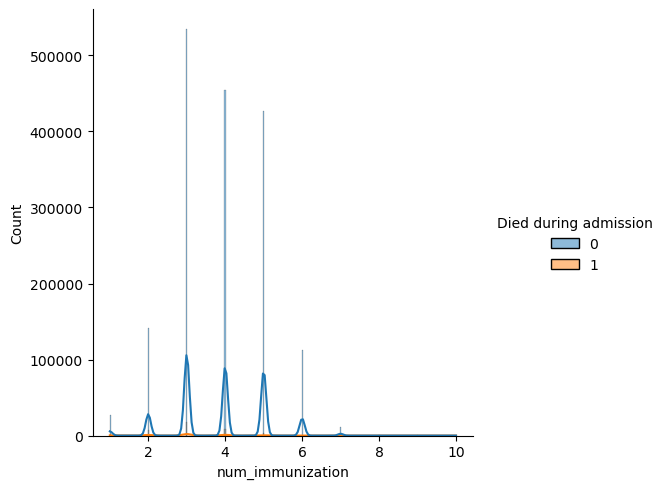

In [21]:
sns.displot(data=inpatient_immun, x='num_immunization', hue = 'Died during admission', kde=True)

<Axes: xlabel='num_immunization', ylabel='Died during admission'>

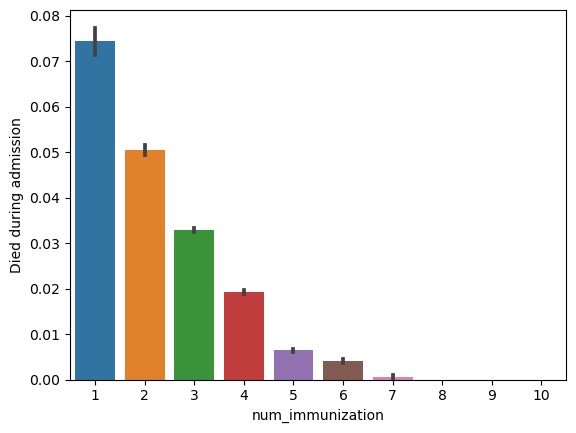

In [23]:
sns.barplot(data=inpatient_immun, x='num_immunization', y = 'Died during admission')

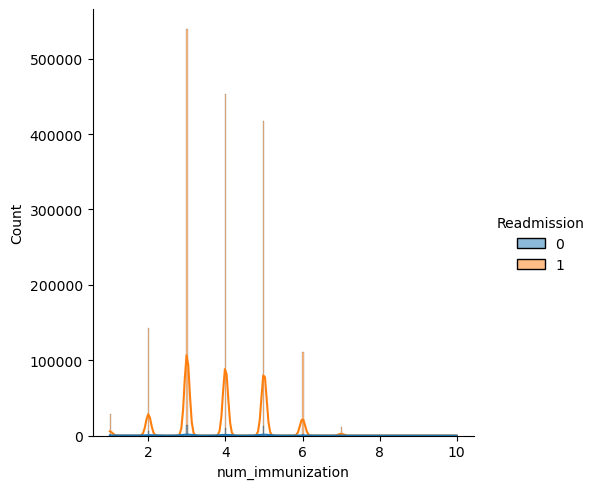

In [22]:
sns.displot(data=inpatient_immun, x='num_immunization', hue = 'Readmission', kde=True)

<Axes: xlabel='num_immunization', ylabel='Readmission'>

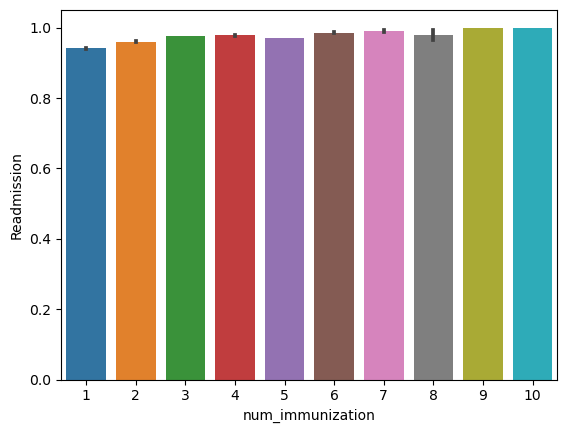

In [24]:
sns.barplot(data=inpatient_immun, x='num_immunization', y = 'Readmission')

/tmp/ipykernel_43164/3194461185.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


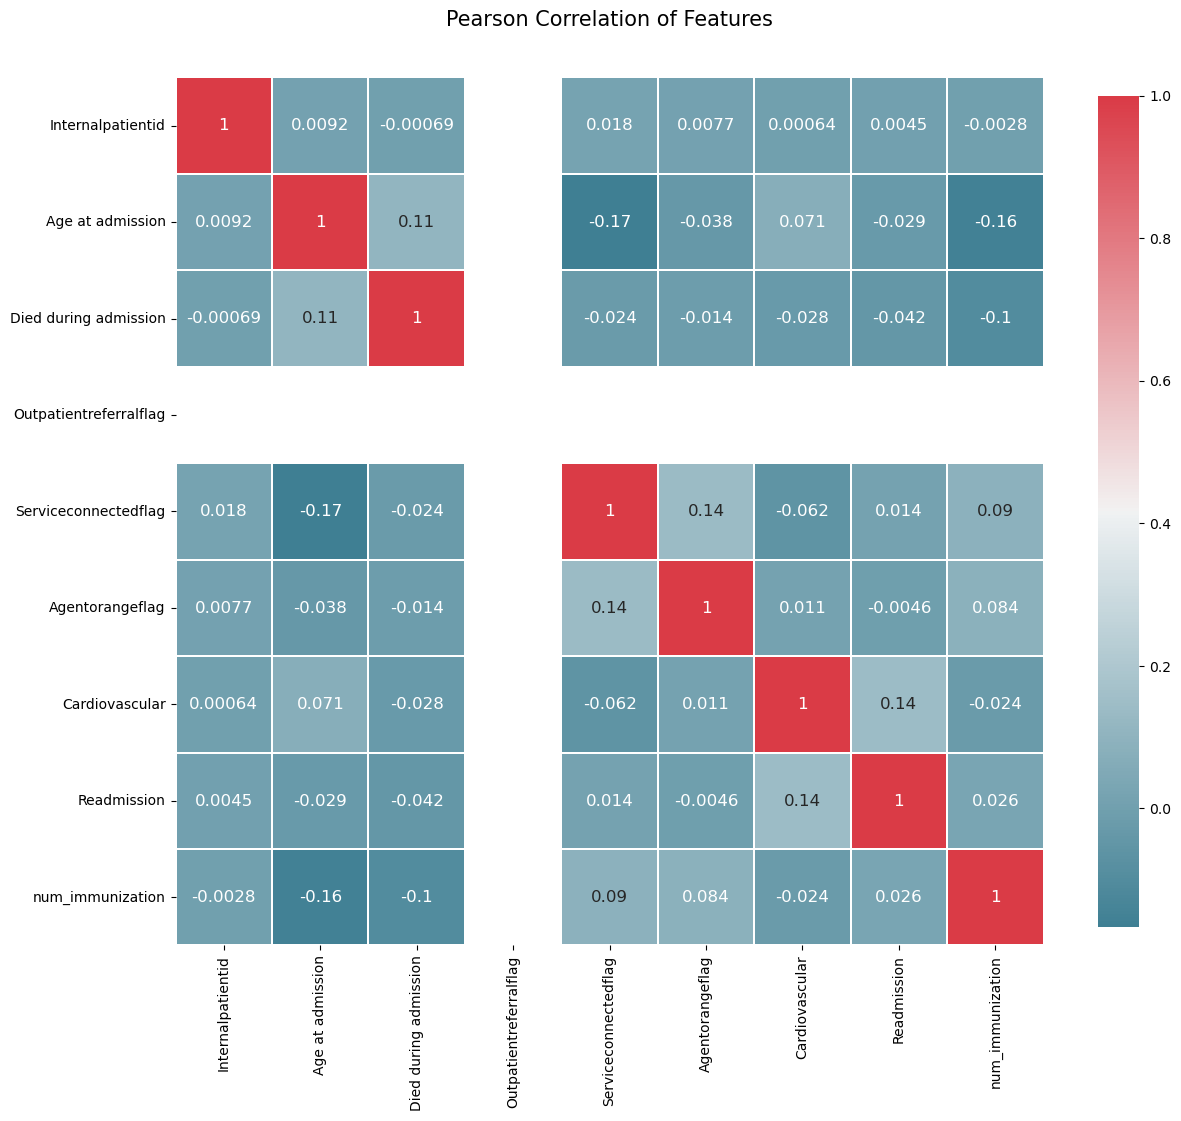

In [25]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(inpatient_immun)